# **Implémentation d'un perceptron multicouche**
# L'objectif est de faire un premier pas vers le Deep Learning en proposant un réseau de neurones sur un cas d'étude pour classer un type de véhicule en fonction de ses caractéristiques mécaniques.

# **Partie II**


 > # Codage en utilisant la bibliothèque Scikit-Learn




In [257]:
#@title 1 - chargement du dataset

#### Charger le fichier .csv

import pandas as pd
from google.colab import files
#data_to_load = files.upload()


In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
#@title 2 - stockage du dataset

#### Utiliser un dataframe pour stocker et exploiter les données
import io
# Chargement des donnees
cars_data = pd.read_csv('/content/drive/MyDrive/ESEO_S7_S8/iA/RDN/Partie 2/cars.csv', sep=';', header=None, engine='python')
print("Ici seules les 10 premières observations du dataset sont affichées.")
cars_data.head(35)

Ici seules les 10 premières observations du dataset sont affichées.


,0,1,2,3,4,5,6,7,8
0,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
5,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
6,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
7,Ford Galaxie 500,15.0,8,429.0,198.0,4341.,10.0,70,US
8,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
9,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US


In [260]:
# Synthèse des observations non nulles par caractéristique
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       408 non-null    object
 1   1       408 non-null    object
 2   2       408 non-null    object
 3   3       408 non-null    object
 4   4       408 non-null    object
 5   5       408 non-null    object
 6   6       408 non-null    object
 7   7       408 non-null    object
 8   8       408 non-null    object
dtypes: object(9)
memory usage: 28.8+ KB


In [261]:
#@title 3 - nettoyage du dataset

#### Certaines valeurs sont nulles ce qui peut déséquilibrer 
#### l'apprentissage si nous les considérons.

# Suppression des observations dont les caractéristiques sont nulles
cars_data_suppr= cars_data.dropna()
# Comparer avec la synthèse précédente
#cars_data_suppr.info()
#cars_data.head(35)

In [262]:
cars_data.shape

(408, 9)

In [263]:
cars_data_suppr.shape

(408, 9)

In [264]:
cars_data_suppr[7]

0      Model
1        INT
2         70
3         70
4         70
       ...  
403       82
404       82
405       82
406       82
407       82
Name: 7, Length: 408, dtype: object

In [265]:
#@title 4 - standardisation des données d'entrée

#### Les données d'entrée doivent être homogénéisées puisqu'elles 
#### présentent des disparités métriques
#### La standardisation permet de limiter la variance entre 
#### ces données


from sklearn import preprocessing
# Garder toutes les valeurs numériques exceptées celles du champ
# "model" pour les données d'entrée
input_data = cars_data_suppr.iloc[2:, 1:7]
# Créer un objet de type StandardScaler pour la standardisation
scaler = preprocessing.StandardScaler()
# Ajuster vos données d'entrée à l'objet et les stocker dans un array
input_scaled_data = scaler.fit_transform(input_data)
X = input_scaled_data
print(X)

[[-0.60195165  1.47634917  1.07087561  0.65406396  0.62010716 -1.25708027]
 [-0.95945951  1.47634917  1.48120772  1.5188866   0.84352182 -1.43565781]
 [-0.60195165  1.47634917  1.17584429  1.14824832  0.53972516 -1.61423534]
 ...
 [ 1.06641835 -0.86276405 -0.57045283 -0.48256008 -0.80903746 -1.3999423 ]
 [ 0.5897412  -0.86276405 -0.71359194 -0.60610617 -0.41894836  1.10014317]
 [ 0.94724906 -0.86276405 -0.72313454 -0.53197851 -0.30664998  1.38586722]]


In [266]:
cars_data_suppr

,0,1,2,3,4,5,6,7,8
0,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
2,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
3,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
4,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
...,...,...,...,...,...,...,...,...,...
403,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
404,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
405,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
406,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


In [267]:
input_data

,1,2,3,4,5,6
2,18.0,8,307.0,130.0,3504.,12.0
3,15.0,8,350.0,165.0,3693.,11.5
4,18.0,8,318.0,150.0,3436.,11.0
5,16.0,8,304.0,150.0,3433.,12.0
6,17.0,8,302.0,140.0,3449.,10.5
...,...,...,...,...,...,...
403,27.0,4,140.0,86.00,2790.,15.6
404,44.0,4,97.00,52.00,2130.,24.6
405,32.0,4,135.0,84.00,2295.,11.6
406,28.0,4,120.0,79.00,2625.,18.6


In [268]:
import numpy as np 


#@title 5 - encodage des données de sortie

#### Les données de sortie sont de type catégorielle.
#### Elles doivent subir un encodage pour les numériser.

# Garder les valeurs du champ "origin" et stocker les valeurs 
# de données de sortie dans un array
output_data = np.array(cars_data_suppr.loc[2:, [8]].values)

from sklearn.preprocessing import LabelEncoder 
# Créer un objet de type LabelEncoder pour l'encodage
encoder =  LabelEncoder()
# Ajuster vos données de sortie à l'objet 
output_encoded_data = encoder.fit_transform(output_data)

#On ajoute un encodage pour créer des classes : 
# Si c'est une américaine [0,0,1] 
# Si c'est une européenne [1,0,0] 
# Si c'est une japonaise [0,1,0] 

from sklearn.preprocessing import OneHotEncoder

# Arranger les valeurs encodées en one_hot_encoding
n_labels = len(output_encoded_data) 
n_unique_labels = len(np.unique(output_encoded_data)) 

#one_hot_encode = np.zeros((n_labels, n_unique_labels))


reshape_1 = output_encoded_data.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
output_1 = encoder.fit_transform(reshape_1)
reshape_2 = output_1.reshape(n_labels, n_unique_labels)

one_hot_encode = reshape_2

Y=one_hot_encode 

# Vérification en prenant les enregistrements 0, 14 et 19 
print("Classe US:",Y[0,:]) 
print("Classe Japan :",Y[14, :]) 
print("Classe Europe :",Y[19, :]) 

Classe US: [0. 0. 1.]
Classe Japan : [0. 0. 1.]
Classe Europe : [0. 0. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [269]:
output_data

array([['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['Europe'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['Japan'],
       ['US'],
       ['US'],
       ['US'],
       ['Japan'],
       ['Europe'],
       ['Europe'],
       ['Europe'],
       ['Europe'],
       ['Europe'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['Japan'],
       ['US'],
       ['Japan'],
       ['US'],
       ['Europe'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['US'],
       ['Europe'],
       ['Europe'],
       ['Europe'],
       ['Japan'],
       ['Japan'],
       ['Eur

In [270]:
#@title 6 - Préparation des données

#### Une fois les données standardisées et encodées, elles doivent
#### être réparties dans deux datasets:
#### - un pour l'apprentissage (80%)
#### - un pour le test (20%)

from sklearn.utils import shuffle 
# Mélange des observations en utilisant l'objet shuffle
X, Y = shuffle(X,Y)
 
from sklearn.model_selection import train_test_split 
# Création des jeux d'apprentissage et de test
train_x, test_x, train_y, test_y =  train_test_split(X, Y, test_size=0.2, random_state=42)


In [271]:
#@title 7 - structuration du perceptron multicouche

#### La structure du perceptron doit être maintenant montée 
#### avant de lancer un entrainement

import tensorflow.compat.v1 as tf 
tf.disable_eager_execution()

# Déclaration des hyperparamètres
epochs = 1000
nombre_neurones_entree = 6 
nombre_neurones_sortie = 3
nombre_neurones_couche_cachee = 4
taux_apprentissage = 0.01
 
# Variable correspondant aux 6 valeurs des neurones d'entrée 
ne_1 = tf.placeholder(dtype=tf.float32, shape=(len(train_x),nombre_neurones_entree))                    


# Variable correspondant aux 3 neurones de sortie 
ne_s = tf.placeholder(dtype=tf.float32, shape=(len(train_y),nombre_neurones_sortie))                  



# Variable correspondant aux valeurs des poids sous forme d'un dictionnaire
poids = { 
   # 6 neurones d'entrées vers 3 neurones de la couche cachée 
   'couche_entree_vers_cachee': tf.Variable(np.random.normal(size = (6, 4)),dtype = tf.float32),  
   # 4 neurones de la couche cachée vers 3 de la couche de sortie 
   'couche_cachee_vers_sortie': tf.Variable(np.random.normal(size = (4, 3)),dtype = tf.float32), 
} 


# Variable correspondant aux valeurs des poids des biais
# sous forme d'un dictionnaire
poids_biais = { 
   # 1 biais de la couche d'entrée vers les 4 neurones de la couche cachée 
   'poids_biais_couche_entree_vers_cachee': tf.Variable(np.random.normal([4]),dtype = tf.float32),
 
   #1 biais de la couche cachée vers les 3 neurones de la couche de sortie 
   'poids_biais_couche_cachee_vers_sortie': tf.Variable(np.random.normal([3]),dtype = tf.float32),
}

In [272]:
#@title 8 - configuration du perceptron multicouche

#### Pour configurer le perceptron, nous avons besoin 
#### d'un certain nombre de fonctions comme celles d'activation, 
#### de calcul pour la mise à jour des poids, d'erreurs, etc.

# déclaration d'une fonction pour initialiser le réseau
def reseau_neurones_multicouches(observations_en_entrees, poids, 
poids_biais): 
 
   #Calcul de l'activation de la première couche en utilisant 
   # matmul et sigmoid
   premiere_activation = tf.matmul(observations_en_entrees, poids['couche_entree_vers_cachee'])+poids_biais['poids_biais_couche_entree_vers_cachee']
   premiere_activation = tf.math.sigmoid(premiere_activation)

   #Calcul de l'activation de la seconde couche 
   activation_couche_cachee = tf.matmul(premiere_activation, poids['couche_cachee_vers_sortie'])+ poids_biais['poids_biais_couche_cachee_vers_sortie']
   activation_couche_cachee = tf.math.sigmoid(activation_couche_cachee)

   return activation_couche_cachee

reseau = reseau_neurones_multicouches(ne_1,poids,poids_biais)

# Fonction d'erreur de moyenne quadratique MSE 
fonction_erreur = tf.math.reduce_sum(tf.square(reseau - train_y))
 
# Descente de gradient avec un taux d'apprentissage fixé à 0.01 
optimiseur = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=taux_apprentissage, name='GradientDescent').minimize(fonction_erreur) #met à jour les poids



In [273]:
#@title 9 - l'apprentissage

#### Pour réaliser cet apprentissage, vous allez devoir effectuer plusieurs 
#### époques pour mettre à jour et optimiser les poids du perceptron.
#### Vous devez pour cela démarrer une session d'apprentissage

#Initialisation des variables 
init = tf.global_variables_initializer() 
 
#Démarrage d'une session d'apprentissage 
session = tf.Session() 
session.run(init) 
 
#Pour la réalisation du graphique pour la MSE 
Graphique_MSE=[] 
 
#Pour chaque epoch 
for i in range(epochs): 
 
  session.run(optimiseur, feed_dict=({ne_1: train_x, ne_s: train_y}))
  MSE = session.run(fonction_erreur, feed_dict=({ne_1: train_x, ne_s: train_y}))
 
  #Affichage des informations 
  Graphique_MSE.append(MSE) 
  print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE)) 

EPOCH (0/1000) -  MSE: 581.7666
EPOCH (1/1000) -  MSE: 446.11646
EPOCH (2/1000) -  MSE: 410.44324
EPOCH (3/1000) -  MSE: 351.99283
EPOCH (4/1000) -  MSE: 186.77794
EPOCH (5/1000) -  MSE: 181.70667
EPOCH (6/1000) -  MSE: 178.55695
EPOCH (7/1000) -  MSE: 175.0064
EPOCH (8/1000) -  MSE: 172.47153
EPOCH (9/1000) -  MSE: 170.69783
EPOCH (10/1000) -  MSE: 169.5392
EPOCH (11/1000) -  MSE: 168.4569
EPOCH (12/1000) -  MSE: 167.41792
EPOCH (13/1000) -  MSE: 166.38855
EPOCH (14/1000) -  MSE: 165.39087
EPOCH (15/1000) -  MSE: 164.41728
EPOCH (16/1000) -  MSE: 163.47614
EPOCH (17/1000) -  MSE: 162.5632
EPOCH (18/1000) -  MSE: 161.67856
EPOCH (19/1000) -  MSE: 160.81812
EPOCH (20/1000) -  MSE: 159.9777
EPOCH (21/1000) -  MSE: 159.15239
EPOCH (22/1000) -  MSE: 158.33598
EPOCH (23/1000) -  MSE: 157.52245
EPOCH (24/1000) -  MSE: 156.70457
EPOCH (25/1000) -  MSE: 155.8753
EPOCH (26/1000) -  MSE: 155.02673
EPOCH (27/1000) -  MSE: 154.15103
EPOCH (28/1000) -  MSE: 153.23999
EPOCH (29/1000) -  MSE: 152.285

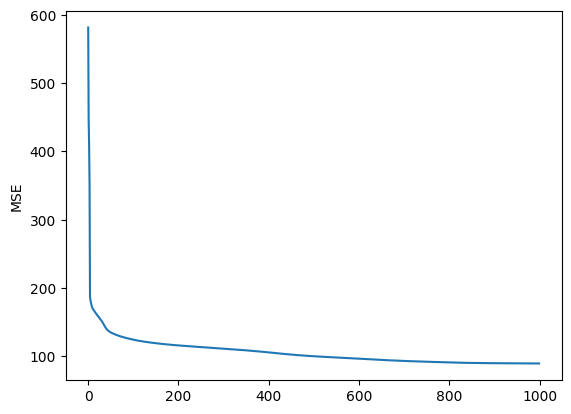

In [276]:
#@title 10 - monitoring

#### Les données qui ont été stockées pendant l'apprentissage sur la fonction
#### de perte vont être affichées pour être analysées

import matplotlib.pyplot as plt 
plt.plot(Graphique_MSE) 
plt.ylabel('MSE') 
plt.show()

# Recommencer l'apprentissage en modifiant largement l'hyper paramètre epoch
# et monitorer les résultats pour comparer

In [275]:
#@title 11 - la prédiction

#### Vérification du bon comportement du perceptron multicouche

# Récupération des index des classifications réalisées 
classifications = tf.argmax(reseau, 1) 
 
# On compare les index issus des classifications avec ceux attendus 
# pour connaître le nombre de bonnes classifications 
calcul_bonnes_classifications = tf.equal(classifications, tf.argmax(ne_s,1)) 
 
# La précision est ensuite calculée en faisant la moyenne 
# des bonnes classifications (après les avoir converties 
# en décimales tf.cast, tf.float32)  
precision = tf.reduce_mean(tf.cast(calcul_bonnes_classifications, tf.float32)) 

#### Précision sur les données de test

nb_classifications = 0; 
nb_bonnes_classifications = 0 
 
#On parcourt l'ensemble des données de tests (test_x) 
for i in range(0,test_x.shape[0]): 
 
   # On récupère les informations des données d'apprentissage 
   # test_x que l'on reformate en une ligne composée de 6 colonnes 
   # pour les données issues des caractéristiques mécaniques
   # et en une ligne et deux colonnes pour la classification attendue 
   features = test_x[i].reshape(1,6) 
   labels = test_y[i].reshape(1,3) 
 
   # On réalise la classification 
   """"prediction_run = session.run(classifications, feed_dict={ne_1: features})""""
   """"print("prediction run {}".format(prediction_run))""""
   # On calcule la précision de la classification 
   # à l'aide de la formule établie auparavant 
   """accuracy_run = session.run(precision, feed_dict={ne_1: features, ne_s:labels})""""
   """print("accuracy run {}".format(accuracy_run))"""
 
   #On affiche pour observation la classe originale et la classification réalisée 
   #print(i,"Classe attendue: ", np.argmax(labels) " Classification: ", prediction_run[0] ) 
 
   nb_classifications = nb_classifications+1 
   if(accuracy_run*100 ==100):
       nb_bonnes_classifications = nb_bonnes_classifications+1  
 
print("-------------") 
print("Précision sur les donnees de tests = "+str((nb_bonnes_classifications/nb_classifications)*100)+"%") 

SyntaxError: ignored